# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [5]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



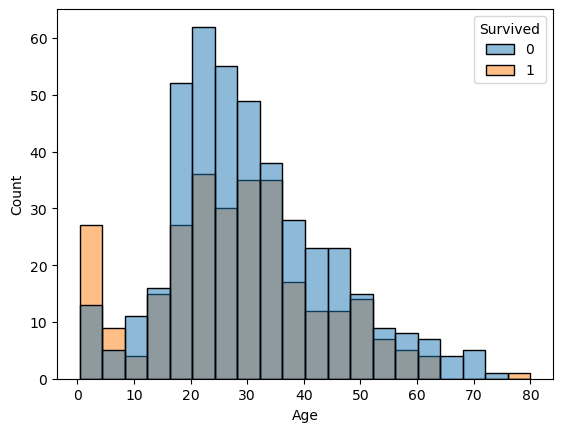

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

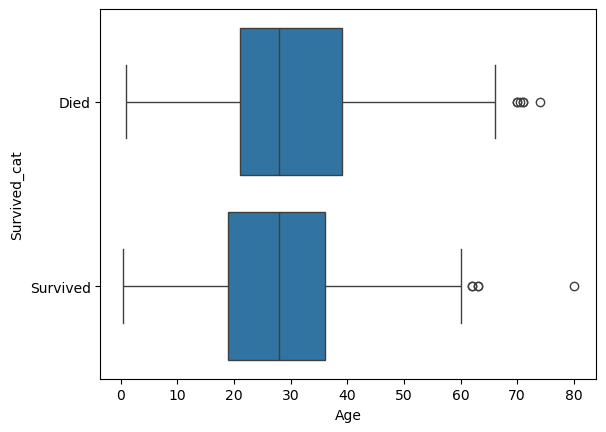

In [7]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [8]:
df['Survived'].dtype

dtype('int64')

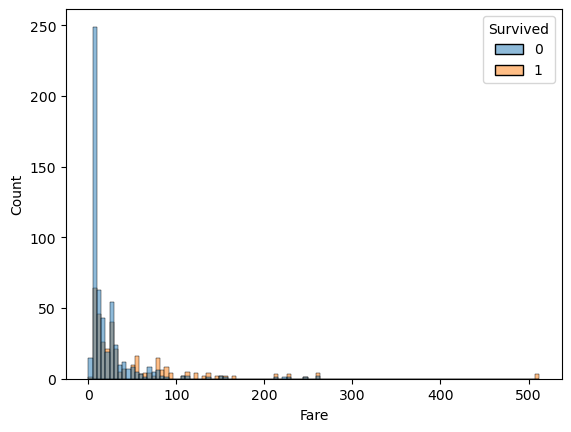

In [9]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

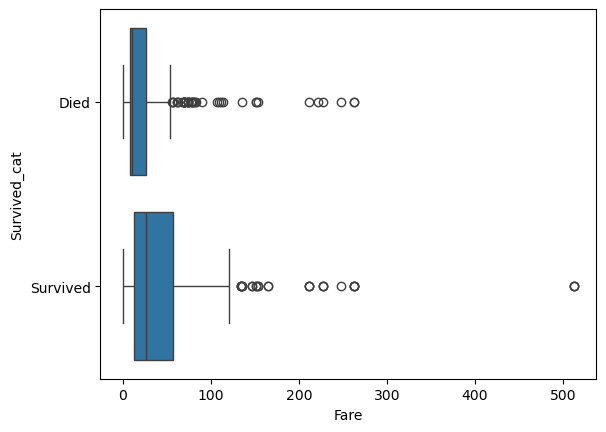

In [10]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()

# ---------- Begin Lab Work ----------
#### Paul Sachse

## Survival By Age

Survived    0    1
AgeGroup          
Adult     372  229
Child      52   61

Normalized:
Survived         0         1
AgeGroup                    
Adult     0.618968  0.381032
Child     0.460177  0.539823


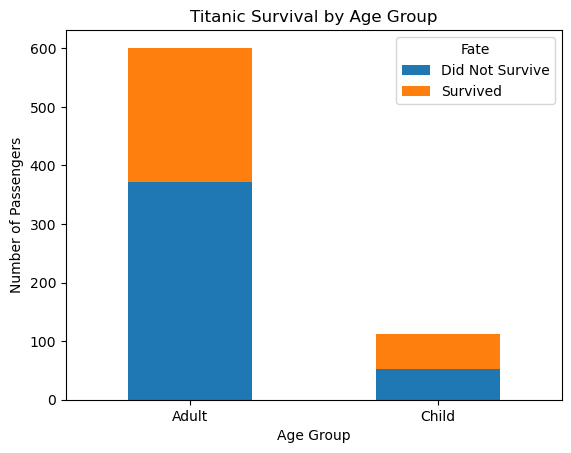

In [27]:
df.loc[df['Age'] < 18, 'AgeGroup'] = 'Child'
df.loc[df['Age'] >= 18, 'AgeGroup'] = 'Adult'

cross_tab = pd.crosstab(df['AgeGroup'], df['Survived'])
print(cross_tab)

ncross_tab = pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index')
print("\nNormalized:")
print(ncross_tab)

ax = cross_tab.plot(kind='bar', stacked=True)

plt.title('Titanic Survival by Age Group')
plt.ylabel('Number of Passengers')
plt.xlabel('Age Group')

plt.legend(['Did Not Survive', 'Survived'], title='Fate')
plt.xticks(rotation=0)

plt.show()

#### Analysis: Breaking age into “Child” and “Adult” makes it easy to see that kids had a better survival rate overall. This grouping keeps the chart readable and aligns with how passengers might’ve been prioritized.

## Survival By Fare

Survived     0    1
FareGroup          
High Fare   99  141
Low Fare   450  201

Normalized:
Survived          0         1
FareGroup                    
High Fare  0.412500  0.587500
Low Fare   0.691244  0.308756


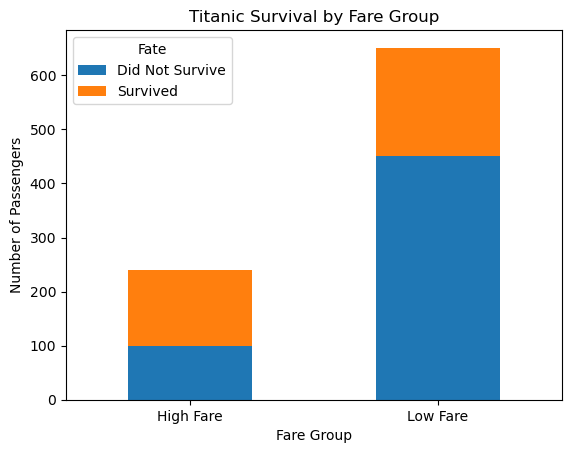

In [30]:
df.loc[df['Fare'] < 30, 'FareGroup'] = 'Low Fare'
df.loc[df['Fare'] >= 30, 'FareGroup'] = 'High Fare'

cross_tab = pd.crosstab(df['FareGroup'], df['Survived'])
print(cross_tab)

ncross_tab = pd.crosstab(df['FareGroup'], df['Survived'], normalize='index')
print("\nNormalized:")
print(ncross_tab)

ax = cross_tab.plot(kind='bar', stacked=True)

plt.title('Titanic Survival by Fare Group')
plt.ylabel('Number of Passengers')
plt.xlabel('Fare Group')

plt.legend(['Did Not Survive', 'Survived'], title='Fate')
plt.xticks(rotation=0)

plt.show()

#### Analysis: Splitting fares into high and low categories helps show how ticket price influenced survival odds. This is a clear visual cue for economic status impacting survival rates.

## Survival By Sex

Survived    0    1
Sex               
female     81  233
male      468  109

Normalized:
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


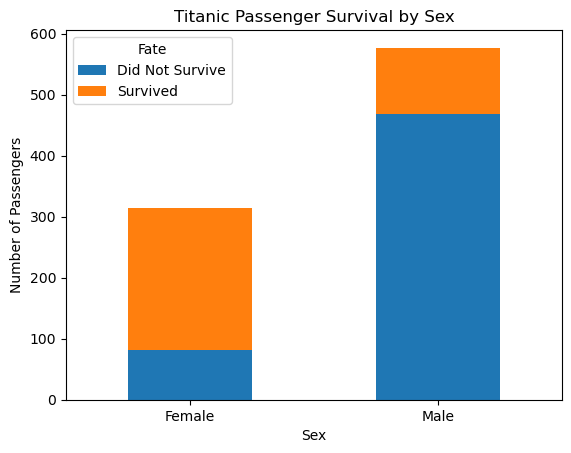

In [33]:
cross_tab = pd.crosstab(df['Sex'], df['Survived'])
print(cross_tab)

ncross_tab = pd.crosstab(df['Sex'], df['Survived'], normalize='index')
print("\nNormalized:")
print(ncross_tab)

ax = cross_tab.plot(kind='bar', stacked=True)

plt.title('Titanic Passenger Survival by Sex')
plt.ylabel('Number of Passengers')
plt.xlabel('Sex')

plt.legend(['Did Not Survive', 'Survived'], title='Fate')
plt.xticks([0,1], ['Female','Male'], rotation=0)

plt.show()

#### Analysis: Comparing survival by sex highlights how strongly “women and children first” applied.

## Survival By Class

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Normalized:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


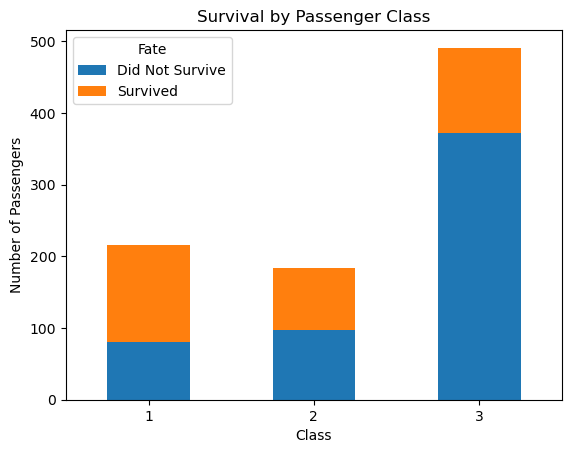

In [37]:
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

ncross_tab = pd.crosstab(df['Pclass'], df['Survived'], normalize='index')
print("\nNormalized:")
print(ncross_tab)

ax = cross_tab.plot(kind='bar', stacked=True)

plt.title('Survival by Passenger Class')
plt.ylabel('Number of Passengers')
plt.xlabel('Class')

plt.legend(['Did Not Survive', 'Survived'], title='Fate')
plt.xticks(rotation=0)

plt.show()

#### Analysis: Charting class levels side by side reveals how first-class passengers were far more likely to survive.

## Survival By Travel Companion

Survived         0    1
HasCompanions          
No             374  163
Yes            175  179

Normalized:
Survived              0         1
HasCompanions                    
No             0.696462  0.303538
Yes            0.494350  0.505650


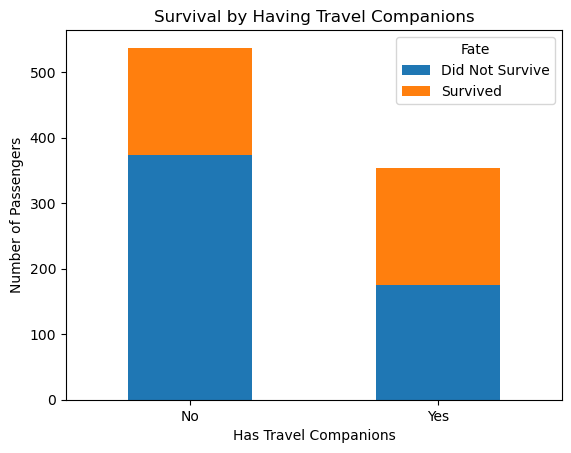

In [41]:
df.loc[(df['SibSp'] + df['Parch']) > 0, 'HasCompanions'] = 'Yes'
df.loc[(df['SibSp'] + df['Parch']) == 0, 'HasCompanions'] = 'No'

cross_tab = pd.crosstab(df['HasCompanions'], df['Survived'])
print(cross_tab)

ncross_tab = pd.crosstab(df['HasCompanions'], df['Survived'], normalize='index')
print("\nNormalized:")
print(ncross_tab)

ax = cross_tab.plot(kind='bar', stacked=True)

plt.title('Survival by Having Travel Companions')
plt.ylabel('Number of Passengers')
plt.xlabel('Has Travel Companions')

plt.legend(['Did Not Survive', 'Survived'], title='Fate')
plt.xticks(rotation=0)

plt.show()

#### Analysis: The travling companion metric provides a broader view of who traveled alone versus with others. It’s an efficient way to summarize the social factor in survival chances.

## Survival By Port

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217

Normalized:
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


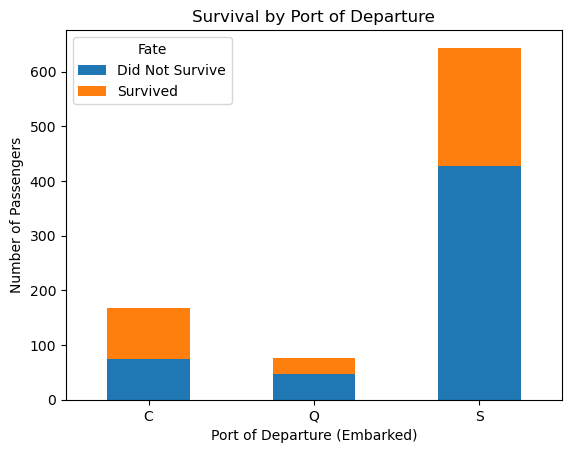

In [42]:
cross_tab = pd.crosstab(df['Embarked'], df['Survived'])
print(cross_tab)

ncross_tab = pd.crosstab(df['Embarked'], df['Survived'], normalize='index')
print("\nNormalized:")
print(ncross_tab)

ax = cross_tab.plot(kind='bar', stacked=True)

plt.title('Survival by Port of Departure')
plt.ylabel('Number of Passengers')
plt.xlabel('Port of Departure (Embarked)')

plt.legend(['Did Not Survive', 'Survived'], title='Fate')
plt.xticks(rotation=0)

plt.show()

#### Analysis: Grouping by port helps show regional differences in survival rates. Using the same stacked format keeps it consistent with the other visuals for quick cross-comparison.

## Most Likely To Survive List

In [44]:
mostLikelyToSurvive = (
    (df['Sex'] == 'female') &
    (df['AgeGroup'] == 'Adult') &
    (df['FareGroup'] == 'High Fare') &
    (df['Pclass'] == 1) &
    (df['HasCompanions'] == 'Yes')
)

df.loc[mostLikelyToSurvive, 'Name']

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
52              Harper, Mrs. Henry Sleeper (Myna Haxtun)
88                            Fortune, Miss. Mabel Helen
151                    Pears, Mrs. Thomas (Edith Wearne)
215                              Newell, Miss. Madeleine
230         Harris, Mrs. Henry Birkhardt (Irene Wallach)
268        Graham, Mrs. William Thompson (Edith Junkins)
275                    Andrews, Miss. Kornelia Theodosia
291              Bishop, Mrs. Dickinson H (Helen Walton)
299      Baxter, Mrs. James (Helene DeLaudeniere Chaput)
311                           Ryerson, Miss. Emily Borie
318                             Wick, Miss. Mary Natalie
319    Spedden, Mrs. Frederic Oakley (Margaretta Corn...
341                       Fortune, Miss. Alice Elizabeth
356                          Bowerman, Miss. Elsie Edith
366     Warren, Mrs. Frank Manley (Anna Sophia Atkinson)
383    Holverson, Mrs. Alexande

#### Most Likely To Survive Selection: Miss. Susan Parker "Suzette" Ryerson
##### Susan Parker Ryerson fits the profile of someone most likely to survive: a young adult woman in first class, traveling with family, and holding a high-fare ticket. This was the group with the greatest survival advantage on the Titanic.
##### Susan “Suzette” Ryerson survived the sinking after boarding lifeboat 4 with her family and two servants. She later volunteered in France during World War I as a nurse and ambulance driver, earning the Croix de Guerre for bravery.
Source: https://www.encyclopedia-titanica.org/

## Most Likely Not To Survive List

In [45]:
leastLikelyToSurvive = (
    (df['Sex'] == 'male') &
    (df['AgeGroup'] == 'Adult') &
    (df['FareGroup'] == 'Low Fare') &
    (df['Pclass'] == 3) &
    (df['HasCompanions'] == 'No')
)

df.loc[leastLikelyToSurvive, 'Name']


4            Allen, Mr. William Henry
12     Saundercock, Mr. William Henry
37           Cann, Mr. Ernest Charles
51       Nosworthy, Mr. Richard Cater
57                Novel, Mr. Mansouer
                    ...              
876     Gustafsson, Mr. Alfred Ossian
877              Petroff, Mr. Nedelio
881                Markun, Mr. Johann
884            Sutehall, Mr. Henry Jr
890               Dooley, Mr. Patrick
Name: Name, Length: 173, dtype: object

#### Least Likely To Survive Selection: Mr. Johann Markun
##### Johann Markun fits the profile of someone least likely to survive: an adult man in third class, traveling alone, and holding a low-fare ticket. The data clearly showed that men in lower classes had the smallest survival chance, so this pattern tracks with the visuals.
##### Johann Markun was a 33-year-old married man from Mittervellach, Austria-Hungary. He boarded at Cherbourg on a third-class ticket and was likely traveling to join relatives in New York. Sadly, he passed away in the sinking, and his body was never identified. His widow and five children later received £130 from the Titanic Relief Fund.
Source: https://www.encyclopedia-titanica.org/